In [ ]:
!pip install tensorflow-gpu

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
import tensorflow as tf

In [ ]:
print(tf.__version__)

2.12.0


In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [ ]:
dataset.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [ ]:
## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)

## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [ ]:
# Part 2 - Now let's make the ANN!

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout


In [ ]:
# Initialising the ANN
classifier = Sequential()

In [ ]:
# Adding the input layer
classifier.add(Dense(units=11,activation='relu'))

In [ ]:
# Adding  first hidden layer
classifier.add(Dense(units=6,activation='relu'))
classifier.add(Dropout(0.2))

In [ ]:
# Adding  second hidden layer
classifier.add(Dense(units=7,activation='relu'))
classifier.add(Dropout(0.3))

In [ ]:
# Adding second hidden layer
classifier.add(Dense(units=1,activation='sigmoid'))

In [ ]:
# define learning rate
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [ ]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
#Early Stoping
early_stoping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [ ]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stoping)

Epoch 1/1000
536/536 [==============================] - 3s 4ms/step - loss: 0.6482 - accuracy: 0.6932 - val_loss: 0.5389 - val_accuracy: 0.7955
Epoch 2/1000
536/536 [==============================] - 1s 3ms/step - loss: 0.5278 - accuracy: 0.7966 - val_loss: 0.4951 - val_accuracy: 0.7955
Epoch 3/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.4932 - accuracy: 0.8043 - val_loss: 0.4559 - val_accuracy: 0.8080
Epoch 4/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.4581 - accuracy: 0.8138 - val_loss: 0.4319 - val_accuracy: 0.8152
Epoch 5/1000
536/536 [==============================] - 2s 5ms/step - loss: 0.4382 - accuracy: 0.8138 - val_loss: 0.3992 - val_accuracy: 0.8289
Epoch 6/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.4116 - accuracy: 0.8322 - val_loss: 0.3838 - val_accuracy: 0.8323
Epoch 7/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.4054 - accuracy: 0.8291 - val_loss: 0.3789 - val_accuracy:

In [ ]:
# list all data in history

print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


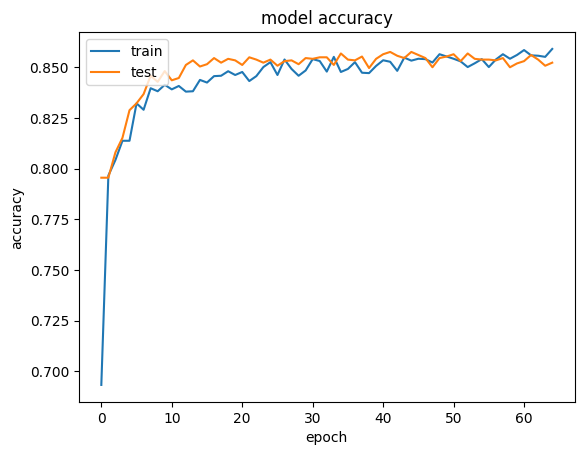

In [ ]:

# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

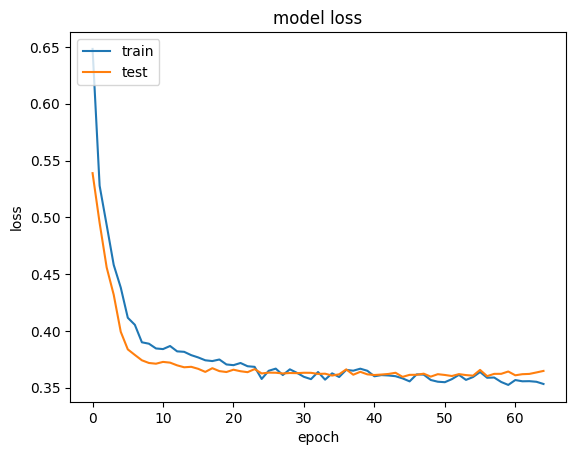

In [ ]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 [==============================] - 0s 1ms/step


In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1555,   40],
       [ 239,  166]])

In [ ]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [ ]:
score

0.8605

In [ ]:
#get the weight
classifier.get_weights()

[array([[-0.02013627,  0.44316217,  0.18449622,  0.01165721,  0.03543886,
         -0.1370383 , -0.05364286,  0.06984069,  0.14030525, -0.30619824,
         -0.23317069],
        [ 0.08927606,  0.08760014, -0.8213078 ,  0.8603196 ,  0.21606779,
          0.2563096 ,  0.34979075,  0.41533488,  0.13102092,  0.0923616 ,
          0.77273107],
        [ 0.24398845,  0.1882613 , -0.23735265,  0.0066347 , -0.16332929,
          0.19918524, -0.36001134,  0.18598138,  0.32606372,  0.19213836,
         -0.19266973],
        [ 0.07522529, -0.3585002 , -0.05665575,  0.11141083,  0.19066231,
         -0.0943119 ,  0.09836233, -0.3617272 ,  0.4022872 , -0.12109424,
         -0.05777559],
        [-0.15769787,  0.42851537,  0.05193049,  0.6632169 ,  0.94207495,
          0.6691001 , -0.35609055, -0.95509684,  0.5403362 ,  0.3021445 ,
         -0.79116905],
        [ 0.32254624, -0.09522694, -0.14953363, -0.10061595, -0.1293594 ,
          0.06237652, -0.17921354, -0.01219176,  0.39005044,  0.0272621